### Цель: обучить нейронную сеть распознавать символы из набора notMNIST_large.

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
import numpy as np
import pandas as pd
import os
import sys
import gc
import tarfile
import scipy
import scipy
scipy.__version__
import scipy.misc
import imageio

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from scipy.misc import toimage
%matplotlib inline 

from matplotlib.pyplot import imread
from matplotlib.pyplot import figure, imshow, axis

from IPython.display import display
from PIL import Image
from scipy import ndimage
from skimage import io
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import v_measure_score
# from __future__ import print_function

In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Conv2D, Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.python.keras import utils

from keras import regularizers
from keras.optimizers import SGD

Using TensorFlow backend.


https://leemeng.tw/simple-image-recognition-using-notmnist-dataset.html

In [6]:
# функция прорисовки графиков 
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [7]:
# функция для вывода ошибочно распознаных изображений
lookup_labels = {k: v for (k, v) in zip(np.arange(10), 'ABCDEFGHIJ')} 
def sanity_check_3(X, y_val, y, i):
    fig = plt.figure(figsize=(2, 2))
    idx = i
    fig.add_subplot(1, 1,  1)
    plt.imshow(X[i, :, :], cmap='gray')
    plt.title('val = '+ lookup_labels[y_val[i]] + '   predict = '+ lookup_labels[y[i]])
    plt.axis('off')


In [8]:
train_filename = '../notMNIST_large' #maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename =  '../notMNIST_small' #maybe_download('notMNIST_small.tar.gz', 8458043)

In [9]:
# функция извлечения файлов в папки по символам

num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
      # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
         os.path.join(root, d) for d in sorted(os.listdir(root))
         if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) != num_classes:
        raise Exception(
          'Expected %d folders, one per class. Found %d instead.' % (
            num_classes, len(data_folders)))
    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

../notMNIST_large already present - Skipping extraction of ../notMNIST_large.
['../notMNIST_large\\A', '../notMNIST_large\\B', '../notMNIST_large\\C', '../notMNIST_large\\D', '../notMNIST_large\\E', '../notMNIST_large\\F', '../notMNIST_large\\G', '../notMNIST_large\\H', '../notMNIST_large\\I', '../notMNIST_large\\J']
../notMNIST_small already present - Skipping extraction of ../notMNIST_small.
['../notMNIST_small\\A', '../notMNIST_small\\B', '../notMNIST_small\\C', '../notMNIST_small\\D', '../notMNIST_small\\E', '../notMNIST_small\\F', '../notMNIST_small\\G', '../notMNIST_small\\H', '../notMNIST_small\\I', '../notMNIST_small\\J']


In [10]:
# !ls /notMNIST_small/

In [11]:
characters = 'ABCDEFGHIJ'.upper()  # sub folders to choose images from 
image_per_folder = 5 # number of images to show for each folder

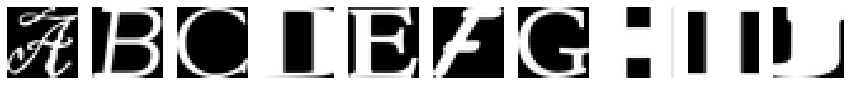

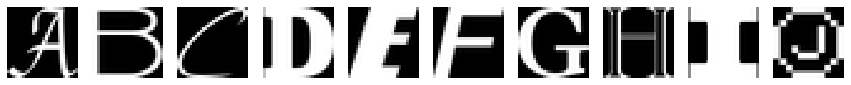

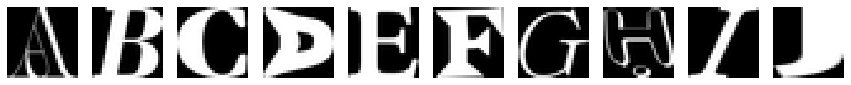

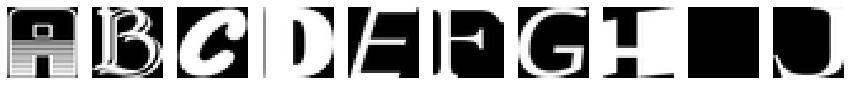

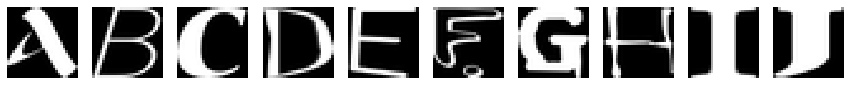

In [13]:
BASE_PATH = '../notMNIST_small'
# BASE_PATH = 'notMNIST_large'

list_of_images = []
for _ in range(image_per_folder):
    for char in characters:
        char_folder = BASE_PATH + '/'+ char + '/'
        images = os.listdir(char_folder)
        image_file_name = images[np.random.randint(len(images))]
        list_of_images.append(char_folder + image_file_name)
    

def showImagesHorizontally(list_of_files):
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    number_of_files = len(list_of_files)
    num_char = len(characters)
    
    for row in range(int(number_of_files/num_char)):
        fig = figure(figsize=(15, 5))
        
        for i in range(num_char):
            a = fig.add_subplot(1, num_char, i + 1)
            image = imread(list_of_files[row * num_char + i])
            imshow(image, cmap='gray')
            axis('off')

showImagesHorizontally(list_of_images)

In [ ]:
Содержимое папок notMNIST_small и notMNIST_large

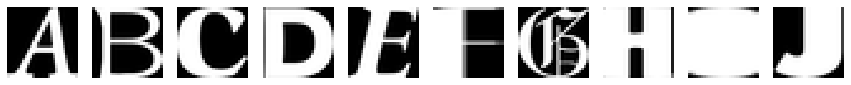

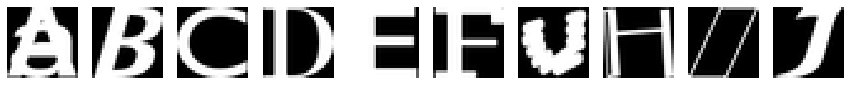

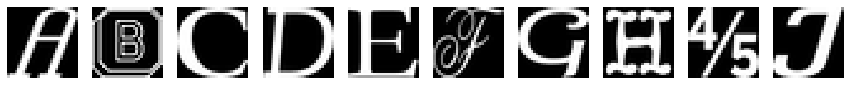

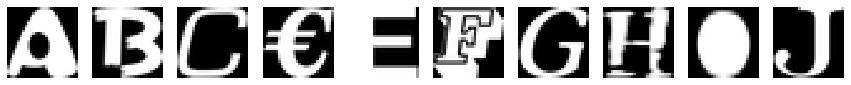

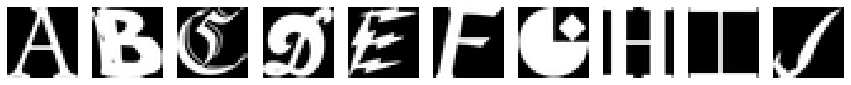

In [14]:
# BASE_PATH = 'notMNIST_small'
BASE_PATH = '../notMNIST_large'

list_of_images = []
for _ in range(image_per_folder):
    for char in characters:
        char_folder = BASE_PATH + '/'+ char + '/'
        images = os.listdir(char_folder)
        image_file_name = images[np.random.randint(len(images))]
        list_of_images.append(char_folder + image_file_name)
    

def showImagesHorizontally(list_of_files):
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    number_of_files = len(list_of_files)
    num_char = len(characters)
    
    for row in range(int(number_of_files/num_char)):
        fig = figure(figsize=(15, 5))
        
        for i in range(num_char):
            a = fig.add_subplot(1, num_char, i + 1)
            image = imread(list_of_files[row * num_char + i])
            imshow(image, cmap='gray')
            axis('off')

showImagesHorizontally(list_of_images)

In [16]:
# characters = 'ABCDEFGHIJ'.upper()
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                           dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
#             image_data = (plt.imread(image_file, 0).astype(float) - pixel_depth / 2) / pixel_depth
            image_data = plt.imread(image_file, 0).astype(float)
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)
    return dataset_names


In [18]:
train_datasets = maybe_pickle(train_folders,45000000)
test_datasets = maybe_pickle(test_folders,1500000)

../notMNIST_large\A.pickle already present - Skipping pickling.
../notMNIST_large\B.pickle already present - Skipping pickling.
../notMNIST_large\C.pickle already present - Skipping pickling.
../notMNIST_large\D.pickle already present - Skipping pickling.
../notMNIST_large\E.pickle already present - Skipping pickling.
../notMNIST_large\F.pickle already present - Skipping pickling.
../notMNIST_large\G.pickle already present - Skipping pickling.
../notMNIST_large\H.pickle already present - Skipping pickling.
../notMNIST_large\I.pickle already present - Skipping pickling.
../notMNIST_large\J.pickle already present - Skipping pickling.
../notMNIST_small\A.pickle already present - Skipping pickling.
../notMNIST_small\B.pickle already present - Skipping pickling.
../notMNIST_small\C.pickle already present - Skipping pickling.
../notMNIST_small\D.pickle already present - Skipping pickling.
../notMNIST_small\E.pickle already present - Skipping pickling.
../notMNIST_small\F.pickle already prese

Number of samples in ../notMNIST_small\A.pickle: 1872
Number of samples in ../notMNIST_small\B.pickle: 1873
Number of samples in ../notMNIST_small\C.pickle: 1873
Number of samples in ../notMNIST_small\D.pickle: 1873
Number of samples in ../notMNIST_small\E.pickle: 1873
Number of samples in ../notMNIST_small\F.pickle: 1872
Number of samples in ../notMNIST_small\G.pickle: 1872
Number of samples in ../notMNIST_small\H.pickle: 1872
Number of samples in ../notMNIST_small\I.pickle: 1872
Number of samples in ../notMNIST_small\J.pickle: 1872


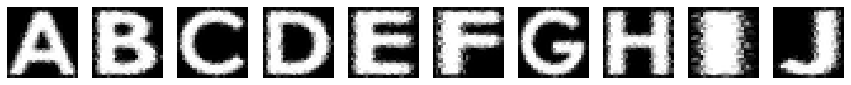

In [23]:
# просмотр изображений из каждого набора
images = []
for file_path in test_datasets:
    data = pickle.load(open(file_path, 'rb'))
    print('Number of samples in {}: {}'.format(file_path, data.shape[0]))
    images.append(data[0, :, :])
    
    
fig = figure(figsize=(15, 5))
for i, image in enumerate(images):
    a=fig.add_subplot(1, len(images), i + 1)
    imshow(image, cmap='gray')
    axis('off')


In [22]:
gc.collect()

60

In [ ]:
Функция разделения данных на train, valid, test.
Тут для test использован сет notMNIST_small, 
в дальнейшем для test будет взят полученный тут valid, а valid будет частью train (как делается с одним сетом).

In [24]:
# Функция разделения данных на train, valid, test.

def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):   
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class
                    
                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 500000
valid_size = 10000
test_size = 15000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
    train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (500000, 28, 28) (500000,)
Validation: (10000, 28, 28) (10000,)
Testing: (15000, 28, 28) (15000,)


In [25]:
# функция рандомизации
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [26]:
# функция вывода изображений
lookup_labels = {k: v for (k, v) in zip(np.arange(10), 'ABCDEFGHIJ')}
def sanity_check(X, y, s=None):
    print(s)
    m1, m2 = X.shape[0], y.shape[0]
    assert(m1 == m2)

    # randomly choose 10 images to check label
    indices = np.random.randint(0, m1, size=10)
    
    fig = plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        fig.add_subplot(1, len(indices), i + 1)
        plt.imshow(X[idx, :, :], cmap='gray')
        plt.title(lookup_labels[y[idx]])
        plt.axis('off')
    

Training dataset:


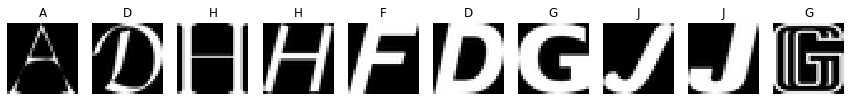

In [27]:
sanity_check(train_dataset, train_labels, 'Training dataset:')

Test dataset:


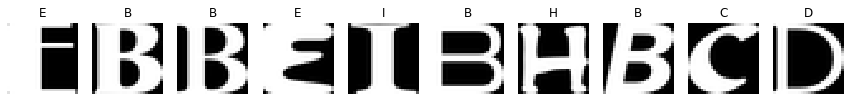

In [28]:
sanity_check(test_dataset, test_labels, 'Test dataset:')

valid dataset:


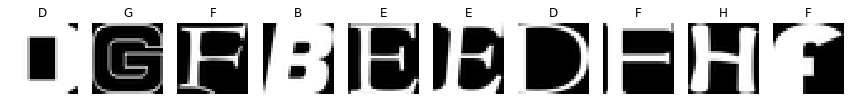

In [29]:
sanity_check(valid_dataset, valid_labels, 'valid dataset:')

In [30]:
# функция сохранения данных в файл, с присвоением меток для train, valid, test.

data_root = '' # Change me to store data elsewhere
pickle_file = os.path.join(data_root, 'notMNIST_500.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [31]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 1648500506


In [44]:
# получение 1/10 данных для пробных обучений

train_size1 = 50000
valid_size1 = 1000
test_size1 = 1500 

valid_dataset1, valid_labels1, train_dataset1, train_labels1 = merge_datasets(
    train_datasets, train_size1, valid_size1)
_, _, test_dataset1, test_labels1 = merge_datasets(test_datasets, test_size1)

print('Training:', train_dataset1.shape, train_labels1.shape)
print('Validation:', valid_dataset1.shape, valid_labels1.shape)
print('Testing:', test_dataset1.shape, test_labels1.shape)

Training: (50000, 28, 28) (50000,)
Validation: (1000, 28, 28) (1000,)
Testing: (1500, 28, 28) (1500,)


In [42]:
%%time
# !!!
# функция удаления дубликатов, требует значительных вычисительных мощностей на больших сетах
def get_duplicate_data(source_dataset, target_dataset, threshold=1, num_duplicate_to_show=0):
    X = source_dataset.reshape(source_dataset.shape[0], -1)
    Y = target_dataset.reshape(target_dataset.shape[0], -1)
    assert(X.shape[1] == Y.shape[1])
    
    dim = X.shape[1]
    cosine_sim = np.inner(X, Y) / np.inner(np.abs(X), np.abs(Y))
    assert(cosine_sim.shape == (X.shape[0], Y.shape[0]))
    
    # for each image in training set, find corresponding duplicate in test/valid set
    dup_target_indices = []
    show_duplicate_counter = 0
    for source_idx in range(cosine_sim.shape[0]):
        dup_indices = list(np.where(cosine_sim[source_idx, :] >= threshold)[0])
    
        # render duplicate images when is available. may omit if visual output is not required
        if dup_indices and num_duplicate_to_show and (show_duplicate_counter < num_duplicate_to_show):
            # show only non-redudent duplicate images
            for i in dup_indices:
                if i in dup_target_indices:
                    dup_indices.remove(i)
            if not dup_indices: continue
            
            if len(dup_indices) == 1:
            
                fig = plt.figure(figsize=(3, 15))
                fig.add_subplot(1, len(dup_indices) + 1, 1)
                plt.imshow(source_dataset[source_idx, :, :], cmap='gray')
                plt.title('Source: ' + str(source_idx))
                plt.axis('off')
            
            
                for i, target_idx in enumerate(dup_indices):
                    fig.add_subplot(1, len(dup_indices) + 1, i + 2)
                    plt.imshow(target_dataset[target_idx, :, :], cmap='gray')
                    plt.title('Target: ' + str(target_idx))
                    plt.axis('off')

                show_duplicate_counter += 1
        
        dup_target_indices.extend(dup_indices)
    return list(set(dup_target_indices))
        
    
# dup_indices_test = get_duplicate_data(train_dataset, test_dataset, num_duplicate_to_show=5)
# print('Number of duplicates in test dataset: {}'.format(len(dup_indices_test)))

Wall time: 0 ns


In [45]:
%%time
# !!!
dup_indices_test = get_duplicate_data(train_dataset1, test_dataset1, num_duplicate_to_show=5)
print('Number of duplicates in test dataset: {}'.format(len(dup_indices_test)))

Number of duplicates in test dataset: 1500
Wall time: 1.99 s


In [46]:
gc.collect()


90

Number of duplicates in validation dataset: 70
Wall time: 1.16 s


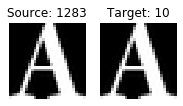

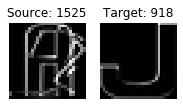

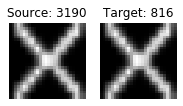

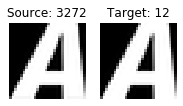

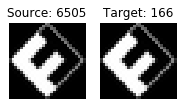

In [47]:
%%time
# !!!
dup_indices_valid = get_duplicate_data(train_dataset1, valid_dataset1, num_duplicate_to_show=5)
print('Number of duplicates in validation dataset: {}'.format(len(dup_indices_valid)))

In [48]:
print("Number of duplicate images in test set: {}".format(len(dup_indices_test)))
print("Number of duplicate images in valid set: {}".format(len(dup_indices_valid)))

Number of duplicate images in test set: 1500
Number of duplicate images in valid set: 70


In [9]:
# функция чтения данных
try:
    with open('notMNIST_500.pickle', 'rb') as handle:
        un_data = pickle.load(handle)

except Exception as e:
    raise
handle.close()

In [10]:
X_train = un_data['train_dataset']
y_train = un_data['train_labels'] 
X_val = un_data['valid_dataset']
y_val = un_data['valid_labels']
X_test = un_data['test_dataset'] 
y_test = un_data['test_labels'] 

In [11]:
y_test

array([0, 5, 4, ..., 3, 4, 3])

In [12]:
X_train.shape

(500000, 28, 28)

In [54]:
X_val[5]

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.4882353 ,
        -0.47254902, -0.46470588, -0.46078432, -0.45686275, -0.45686275,
        -0.45686275, -0.44509804, -0.42941177, -0.40980393, -0.39411765,
        -0.35882354, -0.30784315, -0.22941177, -0.14705883, -0.06078431,
         0.05294118,  0.15490197,  0.24901961,  0.34705883,  0.4490196 ,
         0.49607843,  0.30784315, -0.06862745],
       [-0.07254902,  0.26862746,  0.2647059 ,  0.36666667,  0.39411765,
         0.4019608 ,  0.40588236,  0.40588236,  0.39803922,  0.39411765,
         0.39019608,  0.39411765,  0.40588236,  0.42156863,  0.4372549 ,
         0.46862745,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.48431373,  0.44117647,  0.39803922,  0.33137256,
         0.26078433,  0.23333333,  0.10392157],
       [-0.40980393,  0.2529412 ,  0.5       ,  0.07647059, -0.00980392,
        -0.02941176, -0.05686275, -0.08039216, -0.10392157, -0.12745099,
        -0.14705883, -0.1745

In [16]:

#X_train X_train содержит 60000 изображений размера
# 28x28 —> преобразуем в массив 60000 х 784 
RESHAPED = 784 
X_train = X_train.reshape(500000, RESHAPED)
# X_test = X_test.reshape(15000, RESHAPED) #X_val
X_test = X_val.reshape(10000, RESHAPED) #
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Создание классификатора изображений с использованием последовательного API

In [13]:
np.random.seed(1671)  # для воспроизводимости результатов

# сеть и ее обучение 
NB_EPOCH = 15
BATCH_SIZE = 196
VERBOSE = 1
NB_CLASSES = 10   # количество результатов = числу цифр
# OPTIMIZER = SGD() # SGD оптимизатор
OPTIMIZER = tf.keras.optimizers.SGD()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # какая часть обучающего набора зарезервирована 
RESHAPED = 784 

In [14]:
# нормализация 

# X_train /= 255
# X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# преобразуем векторы классов в бинарные матрицы классов
Y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(y_val, NB_CLASSES)

500000 train samples
15000 test samples


In [17]:
# 10 выходов
# на последнем этапе softmax 

model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE , 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 400000 samples, validate on 100000 samples
Epoch 1/15
400000/400000 [==============================] - 7s 17us/sample - loss: 0.8269 - accuracy: 0.7857 - val_loss: 0.7098 - val_accuracy: 0.8146
Epoch 2/15
400000/400000 [==============================] - 5s 14us/sample - loss: 0.6881 - accuracy: 0.8194 - val_loss: 0.6796 - val_accuracy: 0.8205
Epoch 3/15
400000/400000 [==============================] - 5s 14us/sample - loss: 0.6679 - accuracy: 0.8240 - val_loss: 0.6668 - val_accuracy: 0.8239
Epoch 4/1

In [18]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


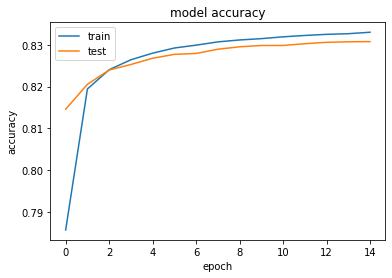

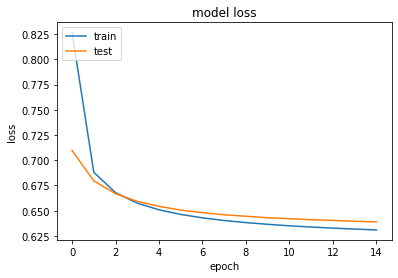

In [20]:
plot_history(hist)

In [21]:
model.evaluate(X_test, Y_test, verbose=VERBOSE)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.6300 - accuracy: 0.8370


[0.6300344717025756, 0.837]

In [22]:
expected = y_val
predicted_cl = model.predict_classes(X_test)
predicted_cl

array([0, 1, 5, ..., 9, 7, 5], dtype=int64)

In [23]:
print(metrics.classification_report(expected, predicted_cl))
print(metrics.confusion_matrix(expected, predicted_cl))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.86      0.81      0.84      1000
           2       0.85      0.86      0.86      1000
           3       0.86      0.84      0.85      1000
           4       0.85      0.79      0.81      1000
           5       0.85      0.87      0.86      1000
           6       0.82      0.85      0.83      1000
           7       0.84      0.85      0.84      1000
           8       0.77      0.81      0.79      1000
           9       0.83      0.85      0.84      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[845  17   3  22   7  17  12  37  22  18]
 [ 16 813   5  48  28  18  17  22  21  12]
 [  6  13 865   8  26  10  34   7  25   6]
 [ 14  27  12 845   9  22  21  18  14  18]
 [ 12  16  58   6 786  21  30  23  35  13]
 [ 18   9  11  11  19 867 

In [86]:
# вывод изображений:
lookup_labels = {k: v for (k, v) in zip(np.arange(10), 'ABCDEFGHIJ')}
def sanity_check_2(X, y, s=None):
    m1, m2 = X.shape[0], y.shape[0]
    assert(m1 == m2)

    for j in range(2):
        indices = np.random.randint(0, m1, size=10)
        fig = plt.figure(figsize=(15, 15))
        for i, idx in enumerate(indices):
            fig.add_subplot(1, len(indices), i + 1)
            plt.imshow(X[idx, :, :], cmap='gray')
            plt.title(lookup_labels[y[idx]])

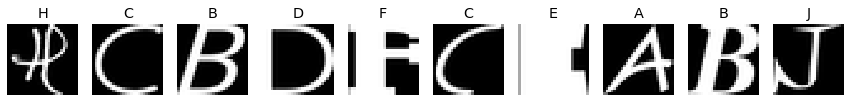

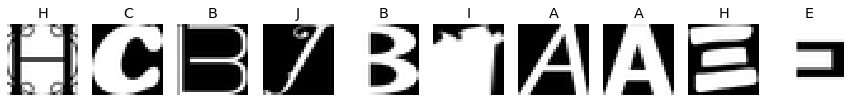

In [88]:
sanity_check_2 (X_val, y_val, 'Test dataset:') #predicted_cl)

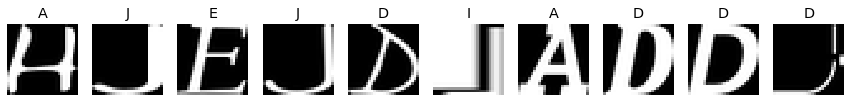

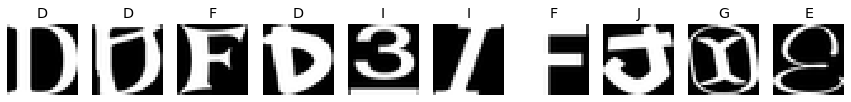

In [89]:
sanity_check_2 (X_val, predicted_cl, 'predicted_ dataset:') 

Wall time: 248 ms


C:\Users\37529\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


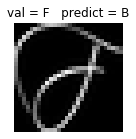

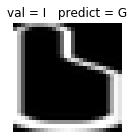

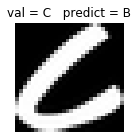

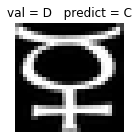

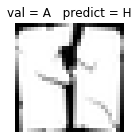

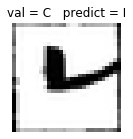

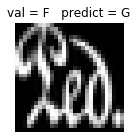

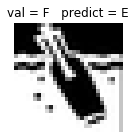

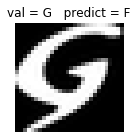

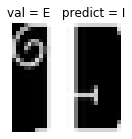

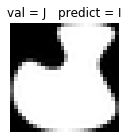

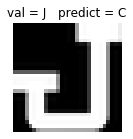

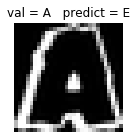

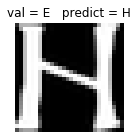

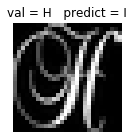

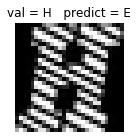

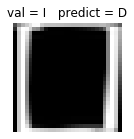

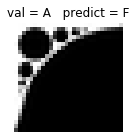

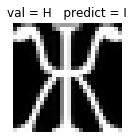

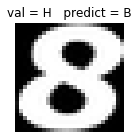

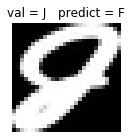

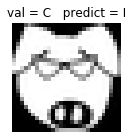

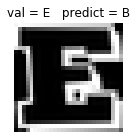

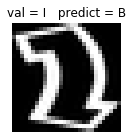

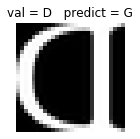

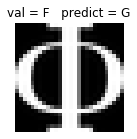

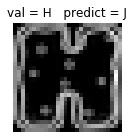

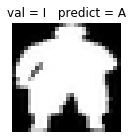

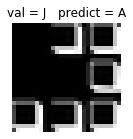

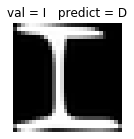

In [24]:
%%time
# вывод ошибочно распознаных изображений
num = 0
for i in range(len(X_val)):   
    if predicted_cl[i] != y_val[i]:
        sanity_check_3 (X_val, y_val, predicted_cl, i)
        num += 1
        if num >= 30:
            break


In [25]:
np.random.seed(1671)  # для воспроизводимости результатов

# сеть и ее обучение 
NB_EPOCH = 15
BATCH_SIZE = 196
VERBOSE = 1
NB_CLASSES = 10   # количество результатов = числу цифр
# OPTIMIZER = SGD() # SGD оптимизатор
# OPTIMIZER = tf.keras.optimizers.SGD()
# OPTIMIZER = tf.keras.optimizers.RMSprop() #SGD()
OPTIMIZER = tf.keras.optimizers.Adam()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # какая часть обучающего набора зарезервирована 

DROPOUT = 0.2


model = Sequential()
model.add(Dense (RESHAPED, input_shape=(RESHAPED,), kernel_regularizer=regularizers.l2(0.01)))#,                           
model.add(Dropout(DROPOUT))
model.add(Dense(392))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(196))
model.add(Activation('relu'))
model.add(Dense(28))
model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])


model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 392)               307720    
_________________________________________________________________
activation_2 (Activation)    (None, 392)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 196)               77028     
_________________________________________________________________
activation_3 (Activation)    (None, 196)              

In [27]:
gc.collect()

6071

In [28]:
expected = y_val
predicted_cl = model.predict_classes(X_test)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


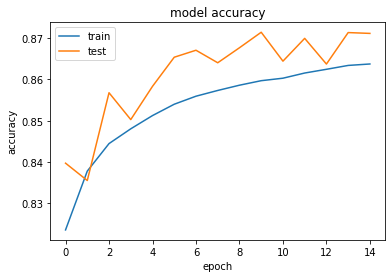

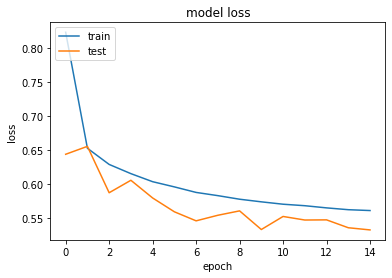

In [29]:
plot_history(history)

C:\Users\37529\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


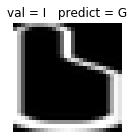

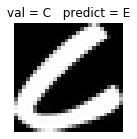

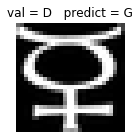

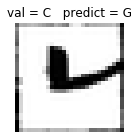

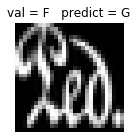

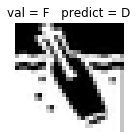

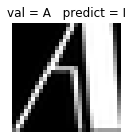

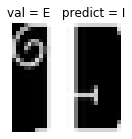

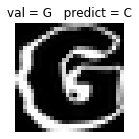

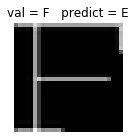

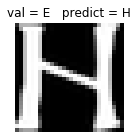

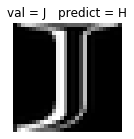

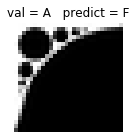

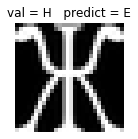

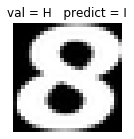

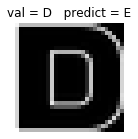

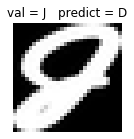

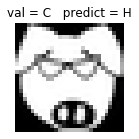

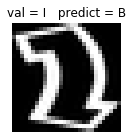

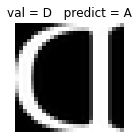

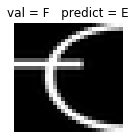

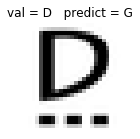

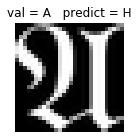

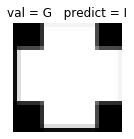

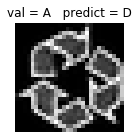

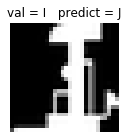

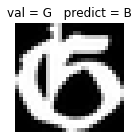

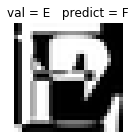

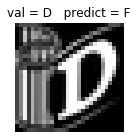

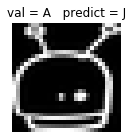

In [30]:
num = 0
for i in range(len(X_val)):   
    if predicted_cl[i] != y_val[i]:
        sanity_check_3 (X_val, y_val, predicted_cl, i)
        num += 1
        if num >= 30:
            break

In [31]:
print(metrics.classification_report(expected, predicted_cl))
print(metrics.confusion_matrix(expected, predicted_cl))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.93      0.84      0.88      1000
           2       0.87      0.88      0.88      1000
           3       0.90      0.87      0.88      1000
           4       0.85      0.87      0.86      1000
           5       0.94      0.90      0.92      1000
           6       0.84      0.87      0.85      1000
           7       0.84      0.90      0.87      1000
           8       0.82      0.88      0.85      1000
           9       0.92      0.88      0.90      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[897   5   4  10  18   5  10  26  17   8]
 [ 23 839   7  34  18   6  20  27  21   5]
 [  6   4 881   7  29   7  40  11  11   4]
 [ 13  14   5 869  14   9  25  18  24   9]
 [ 14  12  33   3 872  11  13  16  20   6]
 [ 10   5   9   6  24 896 

In [41]:
try:
    with open('notMNIST_500.pickle', 'rb') as handle:
        un_data = pickle.load(handle)

except Exception as e:
    raise
handle.close()

X_train = un_data['train_dataset']
y_train = un_data['train_labels'] 
X_val = un_data['valid_dataset']
y_val = un_data['valid_labels']
# X_test = un_data['test_dataset'] 

X_train_0 = un_data['train_dataset']
y_train_0 = un_data['train_labels'] 
X_test = un_data['valid_dataset']
y_test = un_data['valid_labels']

shx = int(X_train.shape[0]*0.2)
X_valid, X_train = X_train_0[:shx], X_train_0[shx:] 
y_valid, y_train = y_train_0[:shx], y_train_0[shx:]

Y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(y_val, NB_CLASSES)
Y_valid = tf.keras.utils.to_categorical(y_valid, NB_CLASSES)
# X_test = un_data['test_dataset'] 
# y_test = un_data['test_labels']
X_train.shape

(400000, 28, 28)

In [42]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [46]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [50]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 400000 samples, validate on 100000 samples
Epoch 1/20
400000/400000 [==============================] - 28s 69us/sample - loss: 0.5300 - accuracy: 0.8453 - val_loss: 0.4485 - val_accuracy: 0.8671
Epoch 2/20
400000/400000 [==============================] - 27s 66us/sample - loss: 0.4061 - accuracy: 0.8796 - val_loss: 0.3936 - val_accuracy: 0.8830
Epoch 3/20
400000/400000 [==============================] - 26s 66us/sample - loss: 0.3622 - accuracy: 0.8926 - val_loss: 0.3703 - val_accuracy: 0.8897
Epoch 4/20
400000/400000 [==============================] - 27s 67us/sample - loss: 0.3347 - accuracy: 0.9004 - val_loss: 0.3522 - val_accuracy: 0.8947
Epoch 5/20
400000/400000 [==============================] - 28s 70us/sample - loss: 0.3146 - accuracy: 0.9060 - val_loss: 0.3415 - val_accuracy: 0.8987
Epoch 6/20
400000/400000 [==============================] - 27s 68us/sample - loss: 0.2987 - accuracy: 0.9104 - val_loss: 0.3310 - val_accuracy: 0.9015
Epoch 7/20
400000/400000 [==========

In [53]:
# сохранение модели
model.save("my_model_2")
model = tf.keras.models.load_model('my_model_2')

INFO:tensorflow:Assets written to: my_model_2\assets


In [54]:
history.params

{'batch_size': 32,
 'epochs': 20,
 'steps': 12500,
 'samples': 400000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

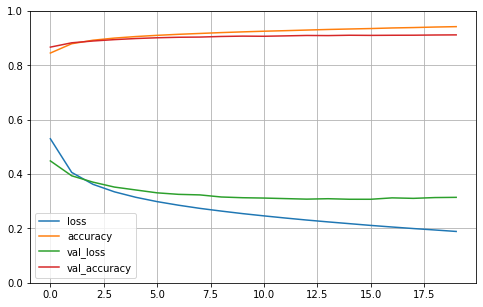

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [57]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.2953 - accuracy: 0.9194


[0.29529535737633705, 0.9194]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


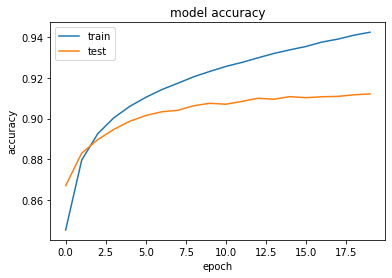

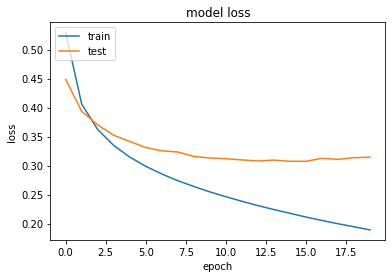

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1000
           1       0.92      0.91      0.92      1000
           2       0.94      0.91      0.93      1000
           3       0.91      0.92      0.92      1000
           4       0.93      0.91      0.92      1000
           5       0.92      0.94      0.93      1000
           6       0.89      0.92      0.90      1000
           7       0.92      0.94      0.93      1000
           8       0.90      0.89      0.90      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[928  12   3   7   4   5  11  14  11   5]
 [  4 910   7  27   6   7  13  12   6   8]
 [  4   9 912  10  16   5  30   4   7   3]
 [  8   8   6 924   4   8  11   8  14   9]
 [  9   6  13  10 910  17  11   6   9   9]
 [ 11   6   2   5   9 941 

In [58]:
expected = y_val
predicted_cl = model.predict_classes(X_test)
plot_history(history)
print(metrics.classification_report(expected, predicted_cl))
print(metrics.confusion_matrix(expected, predicted_cl))

C:\Users\37529\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


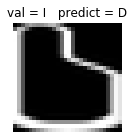

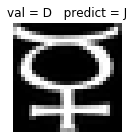

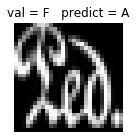

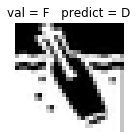

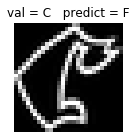

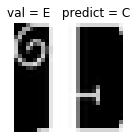

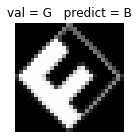

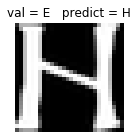

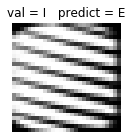

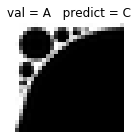

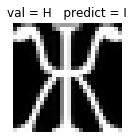

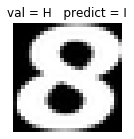

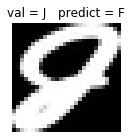

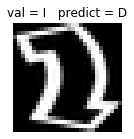

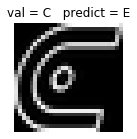

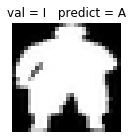

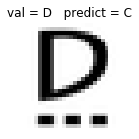

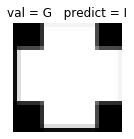

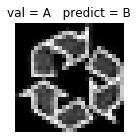

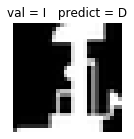

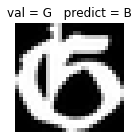

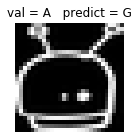

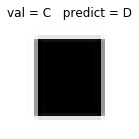

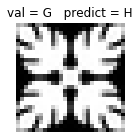

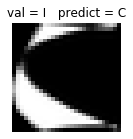

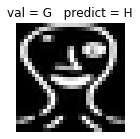

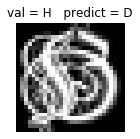

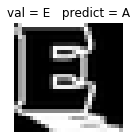

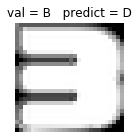

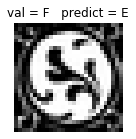

In [59]:
num = 0
for i in range(len(X_val)):   
    if predicted_cl[i] != y_val[i]:
        sanity_check_3 (X_val, y_val, predicted_cl, i)
        num += 1
        if num >= 30:
            break

In [132]:
X_train.shape

(400000, 28, 28)

In [ ]:
Видим, что результат улучшился. Попробуем добавить немного удаления, и изменим размерность слоев

In [61]:
DROPOUT = 0.2
# model.add(Dropout(DROPOUT))
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(392, activation="relu"),
    tf.keras.layers.Dropout(DROPOUT),
    tf.keras.layers.Dense(196, activation="relu"),
    tf.keras.layers.Dropout(DROPOUT),
    tf.keras.layers.Dense(98, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 400000 samples, validate on 100000 samples
Epoch 1/20
400000/400000 [==============================] - 31s 77us/sample - loss: 0.5806 - accuracy: 0.8270 - val_loss: 0.4467 - val_accuracy: 0.8632
Epoch 2/20
400000/400000 [==============================] - 32s 81us/sample - loss: 0.4474 - accuracy: 0.8640 - val_loss: 0.3960 - val_accuracy: 0.8788
Epoch 3/20
400000/400000 [==============================] - 33s 82us/sample - loss: 0.4059 - accuracy: 0.8762 - val_loss: 0.3692 - val_accuracy: 0.8866
Epoch 4/20
400000/400000 [==============================] - 31s 78us/sample - loss: 0.3798 - accuracy: 0.8837 - val_loss: 0.3516 - val_accuracy: 0.8923
Epoch 5/20
400000/400000 [==============================] - 30s 75us/sample - loss: 0.3607 - accuracy: 0.8892 - val_loss: 0.3385 - val_accuracy: 0.8955
Epoch 6/20
400000/400000 [==============================] - 30s 74us/sample - loss: 0.3453 - accuracy: 0.8937 - val_loss: 0.3279 - val_accuracy: 0.8986
Epoch 7/20
400000/400000 [==========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


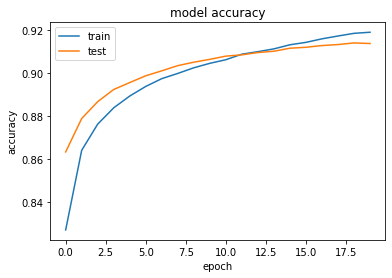

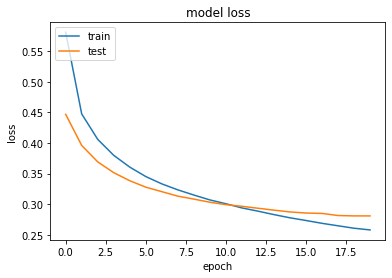

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1000
           1       0.93      0.91      0.92      1000
           2       0.94      0.92      0.93      1000
           3       0.93      0.92      0.92      1000
           4       0.94      0.91      0.92      1000
           5       0.94      0.94      0.94      1000
           6       0.91      0.92      0.92      1000
           7       0.92      0.94      0.93      1000
           8       0.89      0.91      0.90      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[928  12   0   7   6   2   5  20  13   7]
 [ 11 906   5  21   8  10  13  12   6   8]
 [  7  12 923   5  12   4  20   6   9   2]
 [ 14   4   4 923   3   7   8   9  17  11]
 [ 12   9  18   6 906  10  10   9  15   5]
 [ 10   2   4   7  13 939 

In [62]:
expected = y_val
predicted_cl = model.predict_classes(X_test)
plot_history(history)
print(metrics.classification_report(expected, predicted_cl))
print(metrics.confusion_matrix(expected, predicted_cl))

In [63]:
# сохранение модели
model.save("my_model_3")
model = tf.keras.models.load_model('my_model_3')

INFO:tensorflow:Assets written to: my_model_3\assets


C:\Users\37529\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


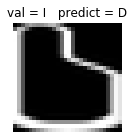

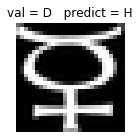

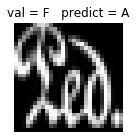

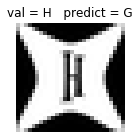

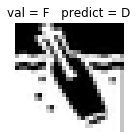

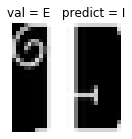

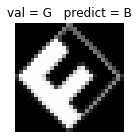

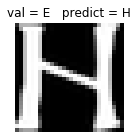

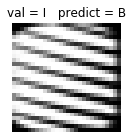

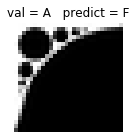

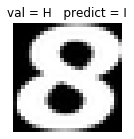

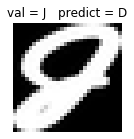

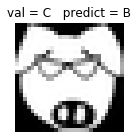

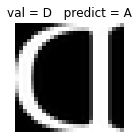

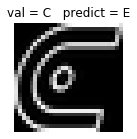

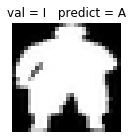

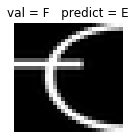

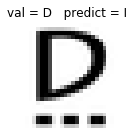

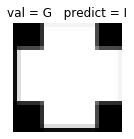

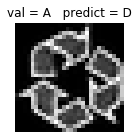

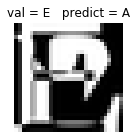

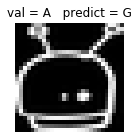

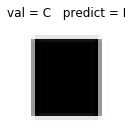

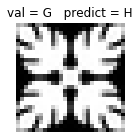

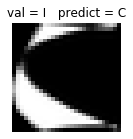

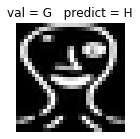

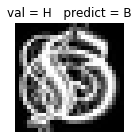

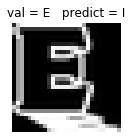

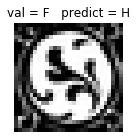

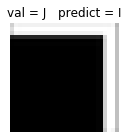

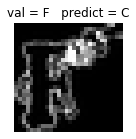

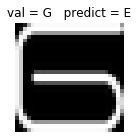

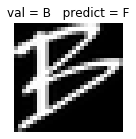

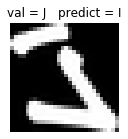

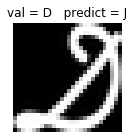

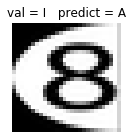

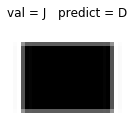

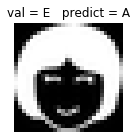

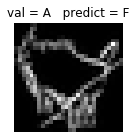

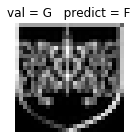

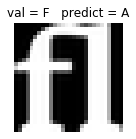

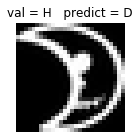

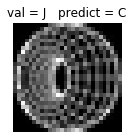

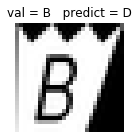

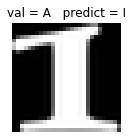

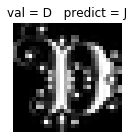

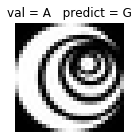

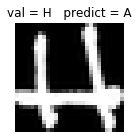

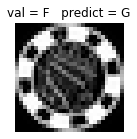

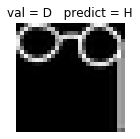

In [65]:
num = 0
for i in range(len(X_val)):   
    if predicted_cl[i] != y_val[i]:
        sanity_check_3 (X_val, y_val, predicted_cl, i)
        num += 1
        if num >= 50:
            break

#### Кривые обучения сошлись и показатели улучшились, количество ошибок уменьшилось.

### Построение сложных моделей с использованием функционального API

In [11]:
np.random.seed(1671)  # для воспроизводимости результатов

# сеть и ее обучение 
NB_EPOCH = 15
BATCH_SIZE = 196
VERBOSE = 1
NB_CLASSES = 10   # количество результатов = числу цифр
# OPTIMIZER = SGD() # SGD оптимизатор
# OPTIMIZER = tf.keras.optimizers.SGD()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # какая часть обучающего набора зарезервирована 


In [14]:
try:
    with open('notMNIST_500.pickle', 'rb') as handle:
        un_data = pickle.load(handle)

except Exception as e:
    raise
handle.close()

X_train = un_data['train_dataset']
y_train = un_data['train_labels'] 
X_val = un_data['valid_dataset']
y_val = un_data['valid_labels']
# X_test = un_data['test_dataset'] 

X_train_0 = un_data['train_dataset']
y_train_0 = un_data['train_labels'] 
X_test = un_data['valid_dataset']
y_test = un_data['valid_labels']

shx = int(X_train.shape[0]*0.2)
X_valid, X_train = X_train_0[:shx], X_train_0[shx:] 
y_valid, y_train = y_train_0[:shx], y_train_0[shx:]

Y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(y_val, NB_CLASSES)
Y_valid = tf.keras.utils.to_categorical(y_valid, NB_CLASSES)
# X_test = un_data['test_dataset'] 
# y_test = un_data['test_labels']
X_train.shape

(400000, 28, 28)

In [15]:
gc.collect()

46

In [16]:
#X_train X_train содержит 60000 изображений размера
# 28x28 —> преобразуем в массив 60000 х 784 
RESHAPED = 784 
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_valid = X_valid.reshape(X_valid.shape[0], RESHAPED)
# X_test = X_test.reshape(15000, RESHAPED) #X_val
X_test = X_val.reshape(X_val.shape[0], RESHAPED) #
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')
X_test.shape

(10000, 784)

In [17]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# obr
model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Flatten(input_shape=[784]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 320000 samples, validate on 80000 samples
Epoch 1/15
320000/320000 [==============================] - 7s 22us/sample - loss: 1.6304 - accuracy: 0.5402 - val_loss: 1.0979 - val_accuracy: 0.7447
Epoch 2/15
320000/320000 [==============================] - 6s 18us/sample - loss: 0.9105 - accuracy: 0.7731 - val_loss: 0.8020 - val_accuracy: 0.7869
Epoch 3/15
320000/320000 [==============================] - 6s 18us/sample - loss: 0.7491 - accuracy: 0.7960 - val_loss: 0.7175 - val_accuracy: 0.8008
Epoch 4/15
320000/320000 [==============================] - 6s 18us/sample - loss: 0.6901 - accuracy: 0.8067 - val_loss: 0.6770 - val_accuracy: 0.8092
Epoch 5/15
320000/320000 [==============================] - 6s 18us/sample - loss: 0.6576 - accuracy: 0.8133 - val_loss: 0.6515 - val_accuracy: 0.8144
Epoch 6/15
320000/320000 [==============================] - 6s 18us/sample - loss: 0.6357 - accuracy: 0.8183 - val_loss: 0.6330 - val_accuracy: 0.8191
Epoch 7/15
320000/320000 [=================

In [24]:
input_A = tf.keras.layers.Input(shape=[480], name="wide_input")
input_B = tf.keras.layers.Input(shape=[304], name="deep_input")
hidden1 = tf.keras.layers.Dense(100, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(10, name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [25]:
# X_train.shape

In [26]:
X_train_A, X_train_B = X_train[:, :480], X_train[:, 480:]
X_train_A.shape

(400000, 480)

In [27]:
X_train_B.shape

(400000, 304)

In [28]:
# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

X_train_A, X_train_B = X_train[:, :480], X_train[:, 480:]
X_valid_A, X_valid_B = X_valid[:, :480], X_valid[:, 480:]
X_test_A, X_test_B = X_test[:, :480], X_test[:, 480:]
# X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
# y_pred = model.predict((X_new_A, X_new_B))

Train on 400000 samples, validate on 100000 samples
Epoch 1/20
400000/400000 [==============================] - 33s 82us/sample - loss: 2.9970 - accuracy: 0.2511 - val_loss: 5.1193 - val_accuracy: 0.2126
Epoch 2/20
400000/400000 [==============================] - 34s 85us/sample - loss: 3.2025 - accuracy: 0.1943 - val_loss: 2.3370 - val_accuracy: 0.2175
Epoch 3/20
400000/400000 [==============================] - 34s 85us/sample - loss: 2.3012 - accuracy: 0.2362 - val_loss: 2.3048 - val_accuracy: 0.2348
Epoch 4/20
400000/400000 [==============================] - 35s 87us/sample - loss: 2.3065 - accuracy: 0.2246 - val_loss: 2.3092 - val_accuracy: 0.2148
Epoch 5/20
400000/400000 [==============================] - 33s 82us/sample - loss: 2.3081 - accuracy: 0.2140 - val_loss: 2.3083 - val_accuracy: 0.2121
Epoch 6/20
400000/400000 [==============================] - 32s 81us/sample - loss: 2.3073 - accuracy: 0.2121 - val_loss: 2.3083 - val_accuracy: 0.2113
Epoch 7/20
400000/400000 [==========

NameError: name 'X_new_A' is not defined

In [44]:
X_train_A, X_train_B = X_train[:, :600], X_train[:, 184:]
X_train_A.shape

(400000, 600)

In [45]:
X_train_B.shape

(400000, 600)

In [48]:
input_A = tf.keras.layers.Input(shape=[600], name="wide_input")
input_B = tf.keras.layers.Input(shape=[600], name="deep_input")
hidden1_B = tf.keras.layers.Dense(600, activation="relu")(input_B)
hidden2_B = tf.keras.layers.Dense(150, activation="relu")(hidden1_B)
hidden1_A = tf.keras.layers.Dense(200, activation="relu")(input_A)
hidden2_A = tf.keras.layers.Dense(100, activation="relu")(hidden1_A)
# hidden3_A = keras.layers.Dense(30, activation="relu")(hidden2_A)
concat = tf.keras.layers.concatenate([hidden2_A, hidden2_B])
output = tf.keras.layers.Dense(10, name="output")(concat)
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [49]:
# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

X_train_A, X_train_B = X_train[:, :600], X_train[:, 184:]
X_valid_A, X_valid_B = X_valid[:, :600], X_valid[:, 184:]
X_test_A, X_test_B = X_test[:, :600], X_test[:, 184:]
# X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=10,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 [==============================] - 34s 86us/sample - loss: 2.1260 - accuracy: 0.1064 - val_loss: 2.2587 - val_accuracy: 0.0992
Epoch 2/10
400000/400000 [==============================] - 34s 86us/sample - loss: 2.2976 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 3/10
400000/400000 [==============================] - 35s 87us/sample - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 4/10
400000/400000 [==============================] - 34s 85us/sample - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 5/10
400000/400000 [==============================] - 33s 83us/sample - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 6/10
400000/400000 [==============================] - 33s 82us/sample - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 7/10
400000/400000 [==========

NameError: name 'X_new_A' is not defined

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-2), 
              metrics=['accuracy'])

X_train_A, X_train_B = X_train[:, :480], X_train[:, 480:]
X_valid_A, X_valid_B = X_valid[:, :480], X_valid[:, 480:]
X_test_A, X_test_B = X_test[:, :480], X_test[:, 480:]
# X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=15,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Train on 400000 samples, validate on 100000 samples
Epoch 1/15
400000/400000 [==============================] - 33s 83us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 2/15
400000/400000 [==============================] - 33s 83us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 3/15
400000/400000 [==============================] - 36s 90us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 4/15
400000/400000 [==============================] - 34s 84us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 5/15
400000/400000 [==============================] - 32s 80us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 6/15
400000/400000 [==============================] - 34s 85us/sample - loss: 2.3026 - accuracy: 0.1830 - val_loss: 2.3028 - val_accuracy: 0.1835
Epoch 7/15
400000/400000 [==========

In [34]:
mse_test

[2.3025851249694824, 0.1826]

## Выводы:

- В процессе работы были построены простые и сложные модели нейронных сетей с использованием функционального API.
- Библиотеки tensorflow, keras позволяют создавать различные модели машинного обучения
- Тема обширная, глубокая и очень-очень интересная !!! 